# Redes Neuronales Artificiales
## Perceptrón

El preceptrón es una estructura que trata de imitar el funcionamiento de una neurona.

Donde el modelo se simplifica a: <br>

<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/Perceptron.svg" alt="Perceptrón" style="width: 400px;"/>

> Fig. 2: [Imágen Perceptrón Wikipedia](https://en.wikipedia.org/wiki/Perceptron) <br>

Considerando $\overline{x}=(x_{1}, x_{2},...,x_{n})$ y $\overline{w}=(w_{1}, w_{2},...,w_{n})$: <br>
$$percept(\overline{x})=f(\overline{x} \cdot \overline{w} + b)=f(\sum(x_{i} \cdot w_{i} )+ b)$$
Dependiendo como se seleccione $f(o)$, un perceptrón es simirar a una regresión lineal ($f(o)=o$) o a una regresión lógistica $f(o)=\frac{1}{1+e^{-o}}$. Obviamente, existen otras funciones de activación que se irán discutiendo a lo largo del curso.

Combinando diversos preceptrones en forma paralela se forma una capa de una red neuronal. En este caso, la capa se conoce como una capa densa, ya que todas las salidas de la capa están conectadas con cada entrada. En el caso de una capa, $W$ es una matriz de dimensiones $cantidad\ de\ características$ X $cantidad\ de\ perceptrones$, $b$ es un vector de dimensionalidad $cantidad\ de\ perceptrones$, y $f(o)$ se aplíca elemento a elemento del resultado.

## Keras
[Keras](https://keras.io/) en una librería de alto nivel para redes neuronales que abstrae las operaciones más comunes de las redes neuronales facilitando la escritura de un código más limpio. Keras está construida sobre [TensorFlow](https://keras.io/backend/), por lo que no es necesario instalar ningún elemento extra. Todas las abstracciones de Keras se encuentran en el paquete tensorflow.keras.

A continuación, se muesta un ejemplo de utilización de Keras para el problema clasificación de MNIST.


In [ ]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, GaussianNoise, GaussianDropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Flatten

import time

# Registrar el tiempo de inicio
start_time = time.time()

def show_confusion_matrix(cm, labels):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
print(mpl.rcParams['figure.figsize'])

[12.0, 8.0]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
100 primeros elementos del conjunto de entrenaimento


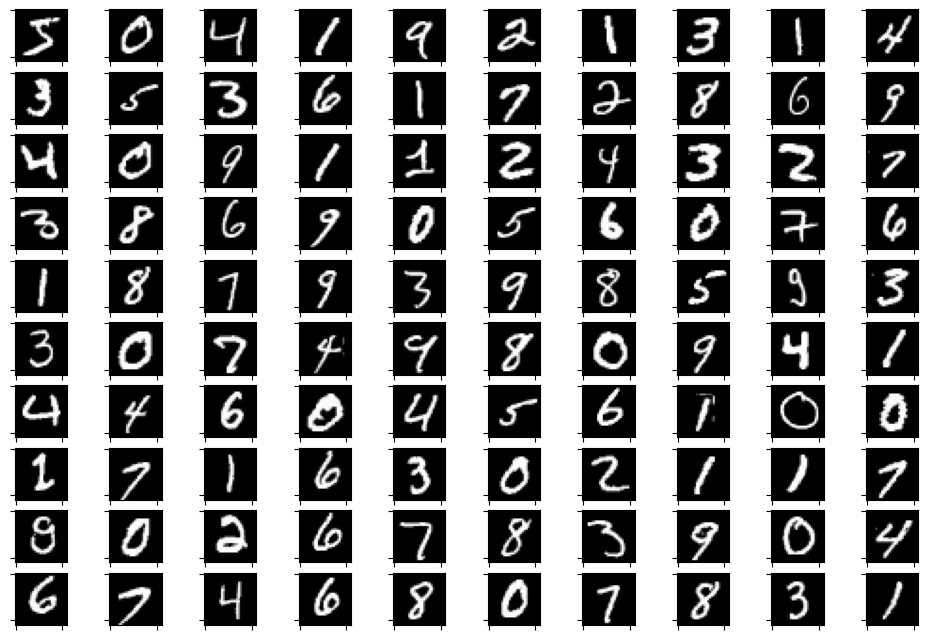

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('100 primeros elementos del conjunto de entrenaimento')
f = plt.figure(111)
for i in range(10):
    for j in range(10):
        ax = f.add_subplot(10, 10, i + j*10 + 1)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.imshow(x_train[i + j*10, :, :], cmap='gray')
plt.show()
print(y_train[:100])

size = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], size)) / 255
x_test = x_test.reshape((x_test.shape[0], size)) / 255

yc_train, yc_test = to_categorical(y_train), to_categorical(y_test)

## Keras capas y modelos
Keras nos permite definir nuestro modelo a través de la combinación de diversas capas en un modelo. Para comenzar, definiremos un modelo basado en una regresión simple y una activación softmax. Para esot utilizaremos dos tipos de capas:

* Input: esta capa nos permite definir la entrada de nuestro modelo.
* Dense: es una capa que multiplica las entradas por los pesos y les suma los bias para finalmente aplicar una función de activación.

Además, definimos el modelo. En este caso, le decimos cual es nuestra entrada y salida. Adicionalmente, lo compilamos indicando la función de perdida y que optimizador utilizaremos. Es importante destacar que como utilizamos elementos estándar de Keras podemos definirlo simplemente con un string, pero podemos definir cualquier función o comportamiento que desearamos.


In [ ]:
# https://keras.io/api/models/model/
i = Input((size,))
d = Dense(10, activation='softmax')(i)

model = Model(inputs=i, outputs=d)
model.compile(loss='categorical_crossentropy', optimizer='sgd')
model.summary()

model.fit(x_train, yc_train, batch_size=50, epochs=100)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3019
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5428
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4582
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4191
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3924
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3818
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3709
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3582
Epoch 9/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3468
Epoch 10/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3433
Epoch 11/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3396
Epoch 12/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3318
Epoch 13/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3351
Epoch 14/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3256
Epoch 15/100
12

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


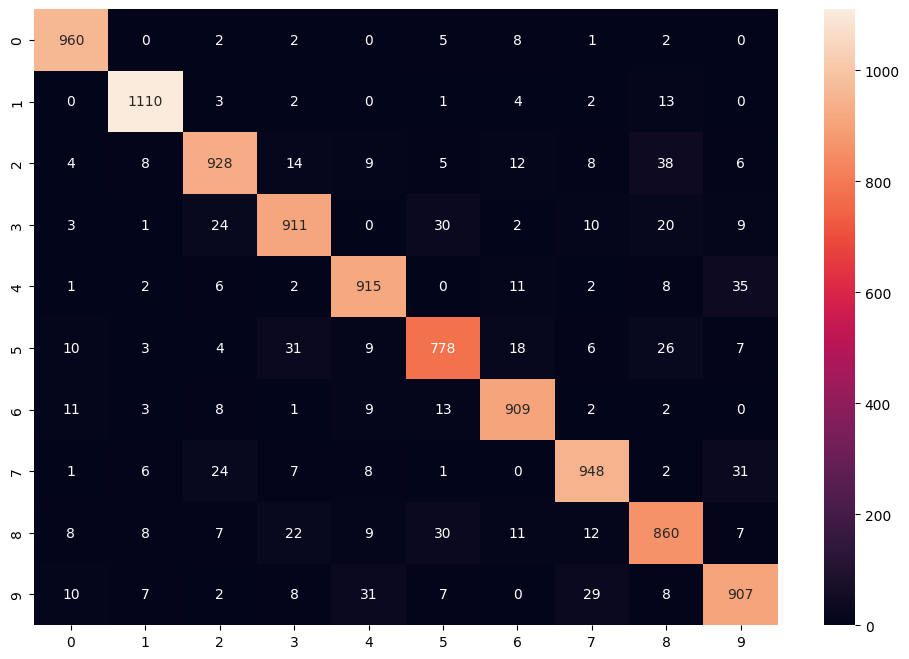

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
show_confusion_matrix(confusion_matrix(y_test, y_pred), list(map(str, range(10))))
print(classification_report(y_test, y_pred))

En este ejemplo podemos ver como cambiamos los parámetros para el algoritmo de optimización.

In [ ]:
i = Input((size,))
d = Dense(10, activation='softmax')(i)

model = Model(inputs=i, outputs=d)
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9))
model.summary()

model.fit(x_train, yc_train, batch_size=50, epochs=100)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6603
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3363
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3143
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2981
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2895
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2815
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2774
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2812
Epoch 9/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2749
Epoch 10/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2664
Epoch 11/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2668
Epoch 12/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2670
Epoch 13/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2655
Epoch 14/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2647
Epoch 15/100
12

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


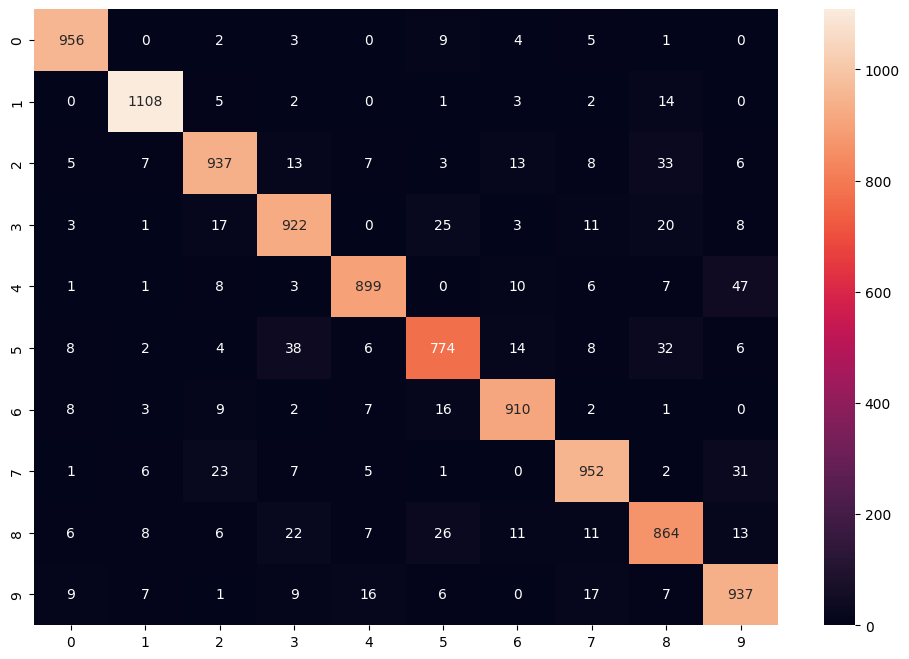

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.95      0.92      0.93       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
show_confusion_matrix(confusion_matrix(y_test, y_pred), list(map(str, range(10))))
print(classification_report(y_test, y_pred))

# El problema del Xor
Como se describió en las Slides, la función Xor no puede ser aprendida por una regresión lógistica.

| $X_0$ | $X_1$ | $Y$ |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [ ]:
x = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.asarray([0, 1, 1, 0])

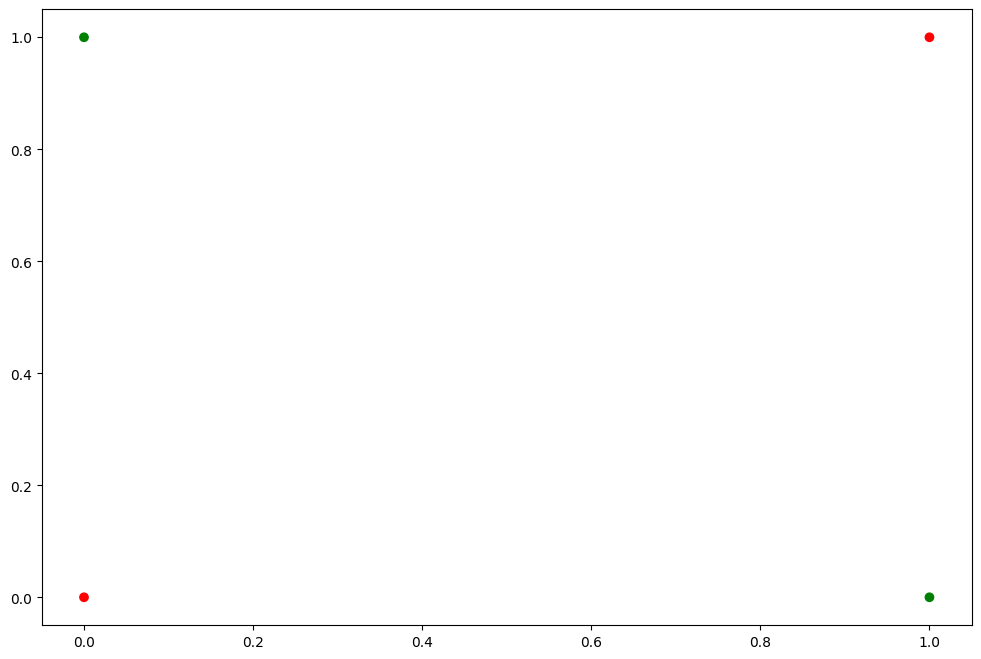

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=['green' if i==1 else 'red' for i in y])
plt.show()

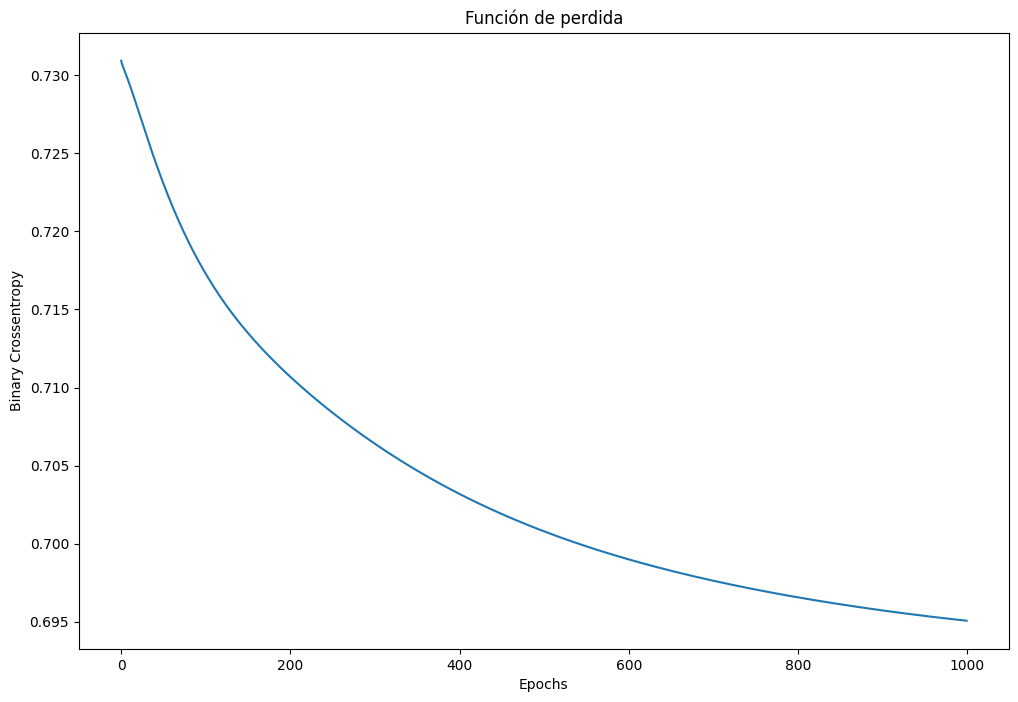

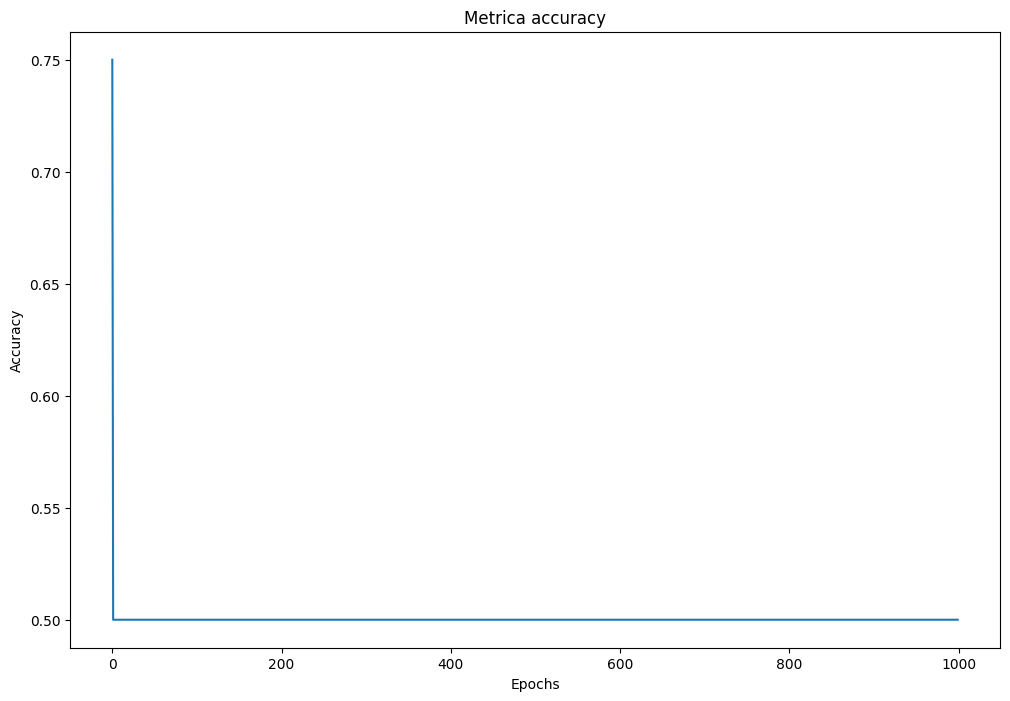

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0.5370149]
 [0.5307692]
 [0.4758673]
 [0.4696115]]


In [ ]:
i = Input((2,))
d = Dense(1, activation='sigmoid')(i)
model = Model(i, d)
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

h = model.fit(x, y, epochs=1000, verbose=0)

plt.title('Función de perdida')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.plot(h.history['loss'])
plt.show()

plt.title('Metrica accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(h.history['accuracy'])
plt.show()
print(model.predict(x))

# Perceptrón multicapas
¿Qué pasa si en vez de usar una sola función lineal concatenamos 2 funciones lineales?

La red nebbasnal más sencilla, conocida como perceptrón multi-capa, no es más que capas de preceptrones aplicadas una sobre la otra.

Entonces un preceptron multicapas tiene la siguiente forma:

$$l_{1}=f_{1}(\overline{x} \cdot W_{1} + \overline{bias_{1}})$$

$$l_{2}=f_{2}(\overline{l_{1}} \cdot W_{2} + \overline{bias_{2}})$$

$$...$$

$$l_{N}=f_{N}(\overline{l_{N-1}} \cdot W_{N} + \overline{bias_{N}})$$

Es importante destacar que, dado una función de error, calcular el gradiente para cada parámetro de la red, sea $W_{i}$ o $bias_{i}$, es simplemente aplicar la regla de la cadena en repetidas oiones. Esto hace que puedan ser calculados de forma automática por librerias como Tensorflow.

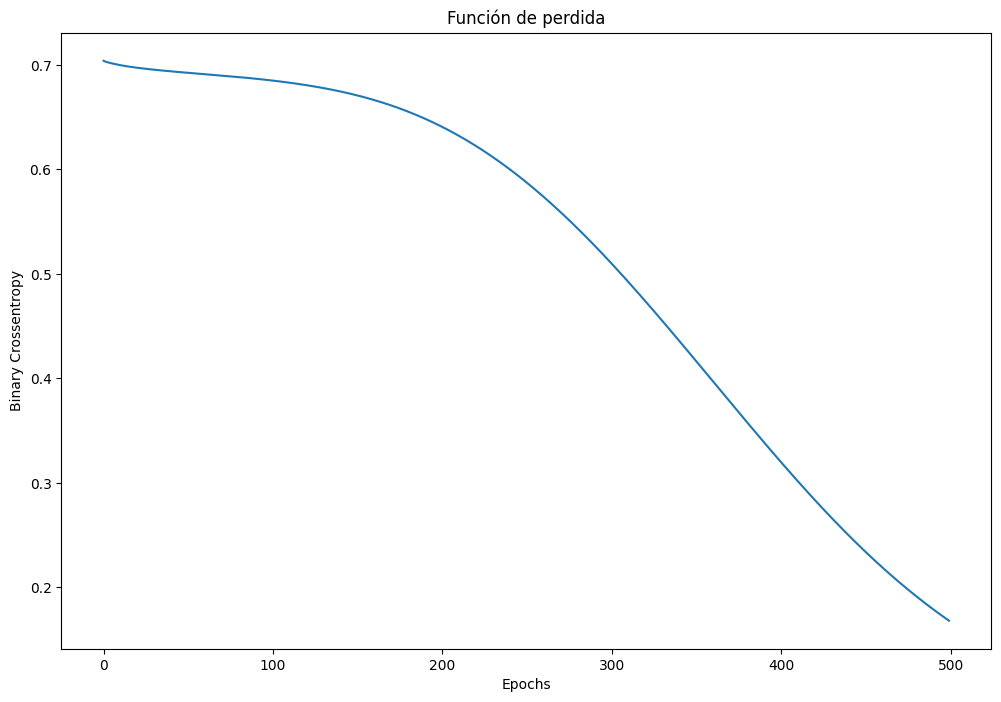

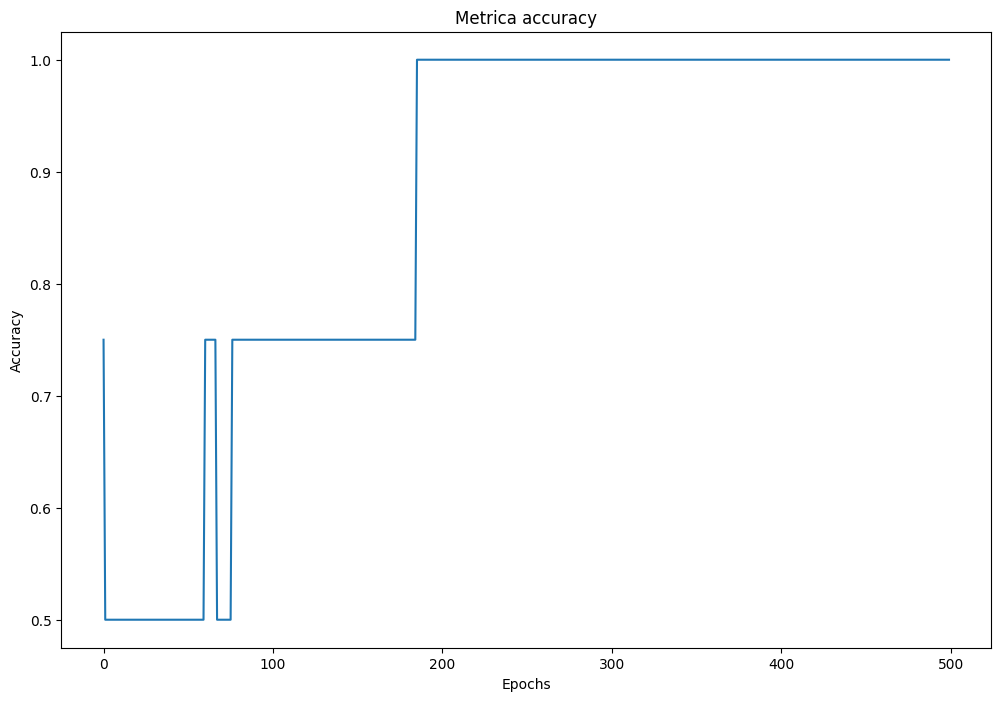

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
[[0.13891353]
 [0.83872986]
 [0.8406846 ]
 [0.15558851]]


In [ ]:
i = Input((2,))
d = Dense(30, activation='tanh')(i)
d = Dense(1, activation='sigmoid')(d)
model = Model(i, d)
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

h = model.fit(x, y, epochs=500, verbose=0)

plt.title('Función de perdida')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.plot(h.history['loss'])
plt.show()

plt.title('Metrica accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(h.history['accuracy'])
plt.show()
print(model.predict(x))

## Overfitting
Uno de los grandes problemas de las redes neuronales, en especial cuando hay pocos datos de entrenamiento, es que tienden a sobreaprender los datos en el conjunto de entrenamiento y no generalizan bien.

Supongamos el caso artificial donde los datos tiene la forma:

$$y = 3*x + rand(-0.5, 0.5)$$

Obviamente un modelo lineal sería más que suficiente para aprender este conjunto de datos.


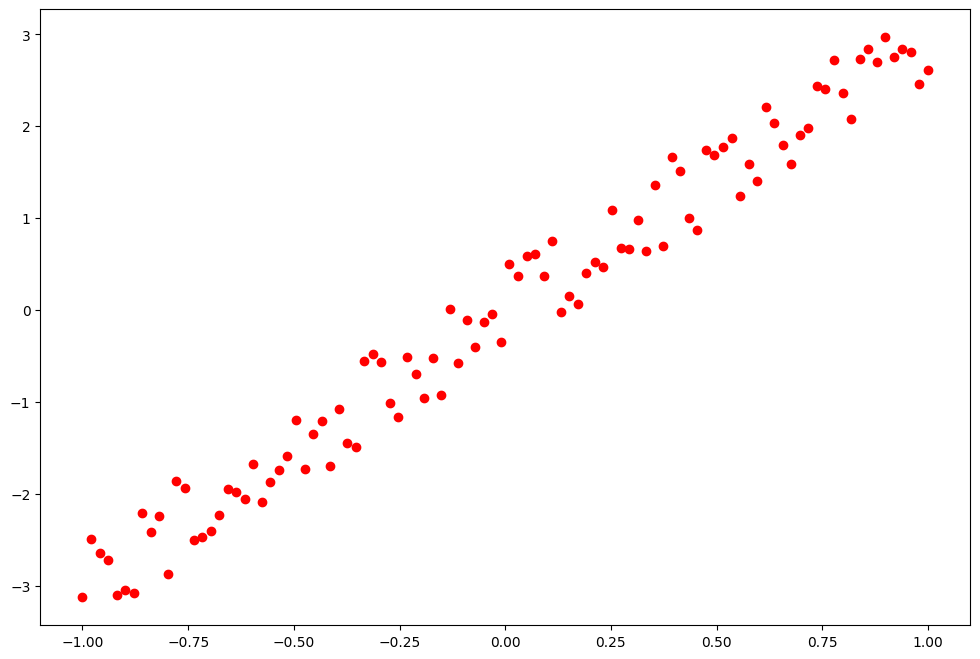

x: [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364 

In [ ]:
np.random.seed(42)
'''def gen_random_data(mult):
    _x = np.linspace(-1, 1, 20)
    _error = 0.5 * (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()'''
def gen_random_data(mult):
    _x = np.linspace(-1, 1, 100)
    _error = (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()
print('x: {}'.format(x))
print('y: {}'.format(y))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


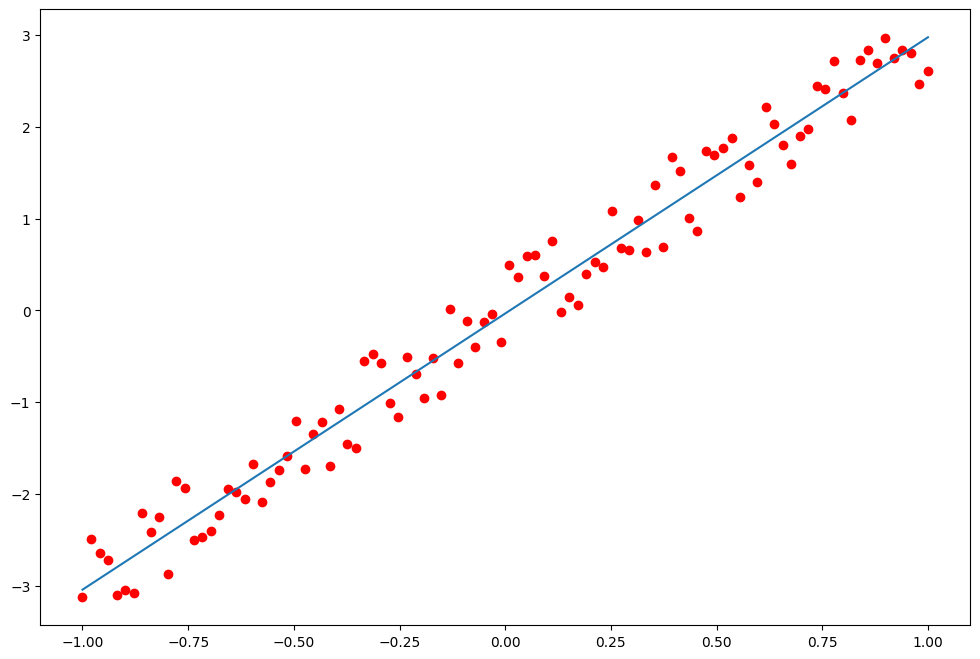

In [ ]:
i = Input((1,))
d = Dense(1)(i)
model = Model(i, d)
model.compile(loss='mse', optimizer='sgd')

h = model.fit(np.expand_dims(x, axis=-1), y, epochs=300, verbose=0)
plt.plot(x, y, 'ro', x, model.predict(np.expand_dims(x, axis=-1)))
plt.show()

Pero, si aplicamos un modelo con más capas, este modelo tiende a aprender los "errores" en las observacciones del conjunto de entrenamiento. Con lo que surge la pregunta ¿Cuál es el mejor modelo el representado por la linea azul o la linea verde?

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


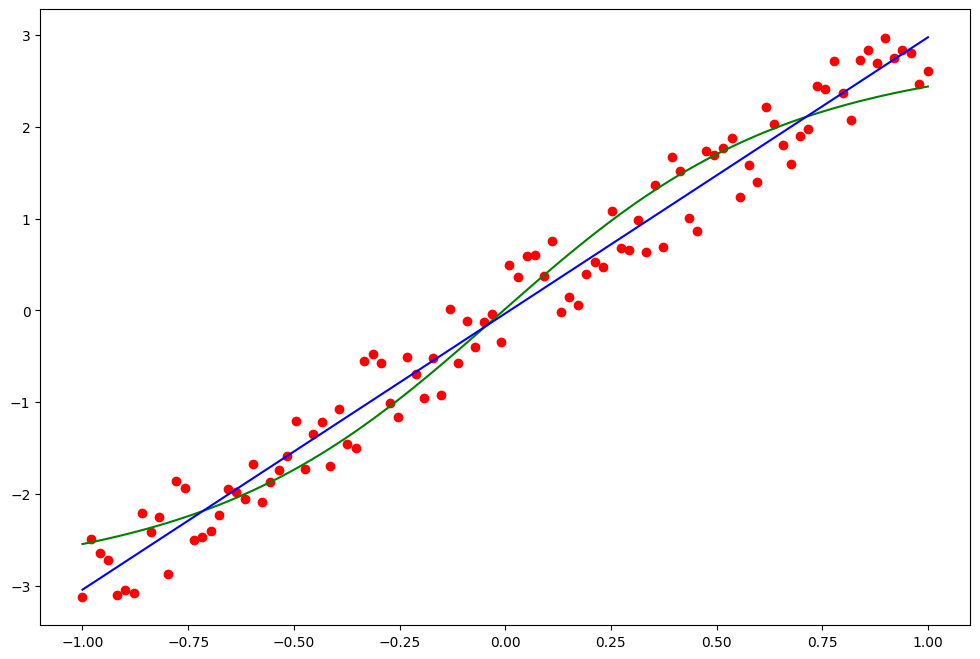

In [ ]:
i = Input((1,))
d = Dense(2, activation='sigmoid')(i)
d = Dense(1)(d)
model1 = Model(i, d)
model1.compile(loss='mse', optimizer='sgd')

h = model1.fit(np.expand_dims(x, axis=-1), y, epochs=1000, verbose=0, callbacks=[ReduceLROnPlateau('loss')])
plt.plot(x, y, 'ro', x, model1.predict(np.expand_dims(x, axis=-1)),'g-' ,x, model.predict(np.expand_dims(x, axis=-1)), 'b-')
plt.show()

## Regularizaciones

En las siguientes celdas se muestran ejemplos de técnicas de regularización generalmente utilizadas en las redes neuronales. Es importante destacar que no son las únicas técnicas que se utilizan para evitar el overfitting.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
i = Input((X_train.shape[1],))
d = Dense(512, activation='relu')(i)
d = Dense(256, activation='relu')(d)
d = Dense(128, activation='relu')(d)
d = Dense(10, activation='softmax')(d)
model = Model(i, d)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8980 - loss: 0.3341 - val_accuracy: 0.9671 - val_loss: 0.1093
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9722 - loss: 0.0879 - val_accuracy: 0.9761 - val_loss: 0.0796
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0553 - val_accuracy: 0.9698 - val_loss: 0.0982
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9792 - val_loss: 0.0708
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0369 - val_accuracy: 0.9781 - val_loss: 0.0788
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9815 - val_loss: 0.0717
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9810 - val_loss: 0.0751
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0235 -

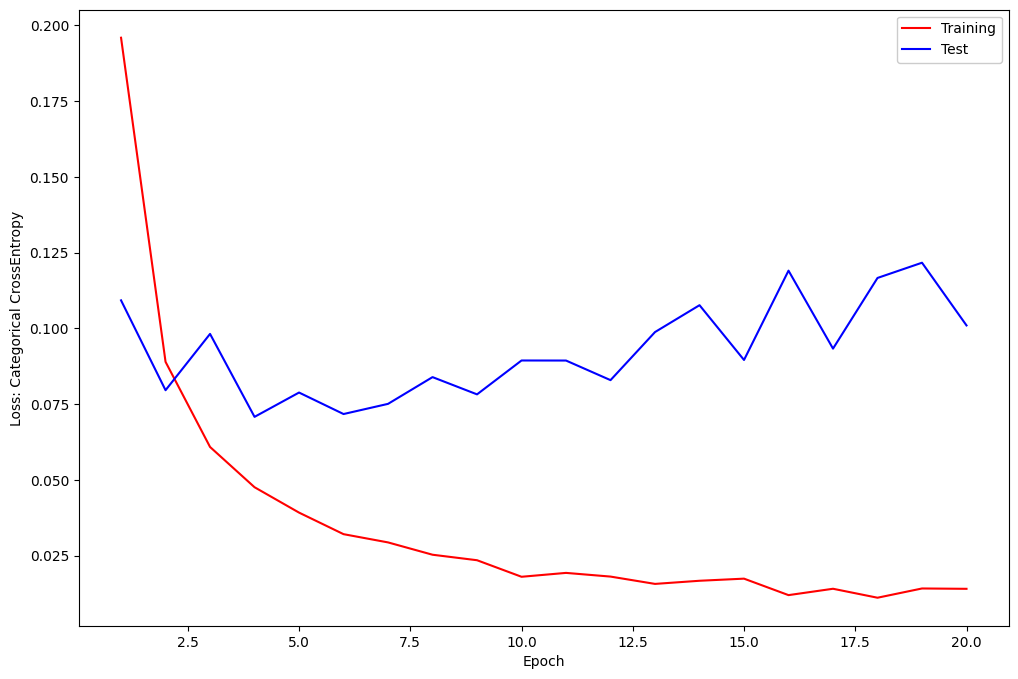

In [ ]:
plt.plot(range(1, 21), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

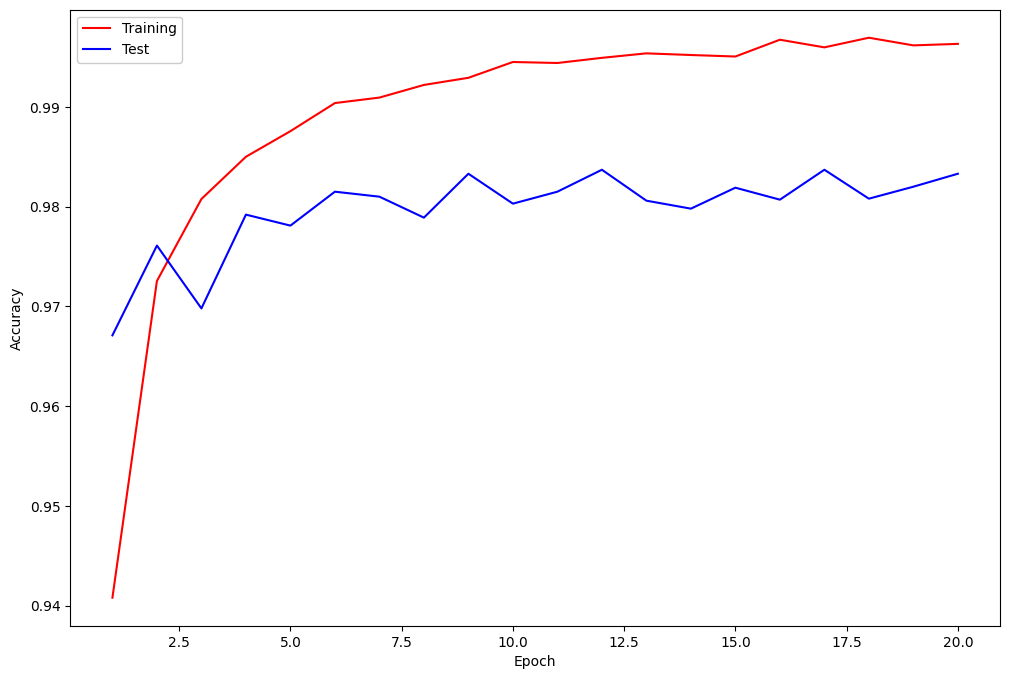

In [ ]:
plt.plot(range(1, 21), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# categorical cross entropy https://vitalflux.com/keras-categorical-cross-entropy-loss-function/#:~:text=categorical_crossentropy%3A%20Used%20as%20a%20loss,into%20categorical%20encoding%20using%20keras.
i = Input((X_train.shape[1],))
d = Dense(512, activation='relu', kernel_regularizer=L2(0.0001))(i)
d = Dense(256, activation='relu', kernel_regularizer=L2(0.0001))(d)
d = Dense(128, activation='relu', kernel_regularizer=L2(0.0001))(d)
d = Dense(10, activation='softmax', kernel_regularizer=L2(0.0001))(d)
model = Model(i, d)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8993 - loss: 0.4222 - val_accuracy: 0.9646 - val_loss: 0.2022
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9703 - loss: 0.1902 - val_accuracy: 0.9668 - val_loss: 0.1967
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.1613 - val_accuracy: 0.9735 - val_loss: 0.1661
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.1410 - val_accuracy: 0.9659 - val_loss: 0.1854
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9843 - loss: 0.1235 - val_accuracy: 0.9810 - val_loss: 0.1408
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.1146 - val_accuracy: 0.9745 - val_loss: 0.1468
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.1078 - val_accuracy: 0.9753 - val_loss: 0.1494
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.1056 

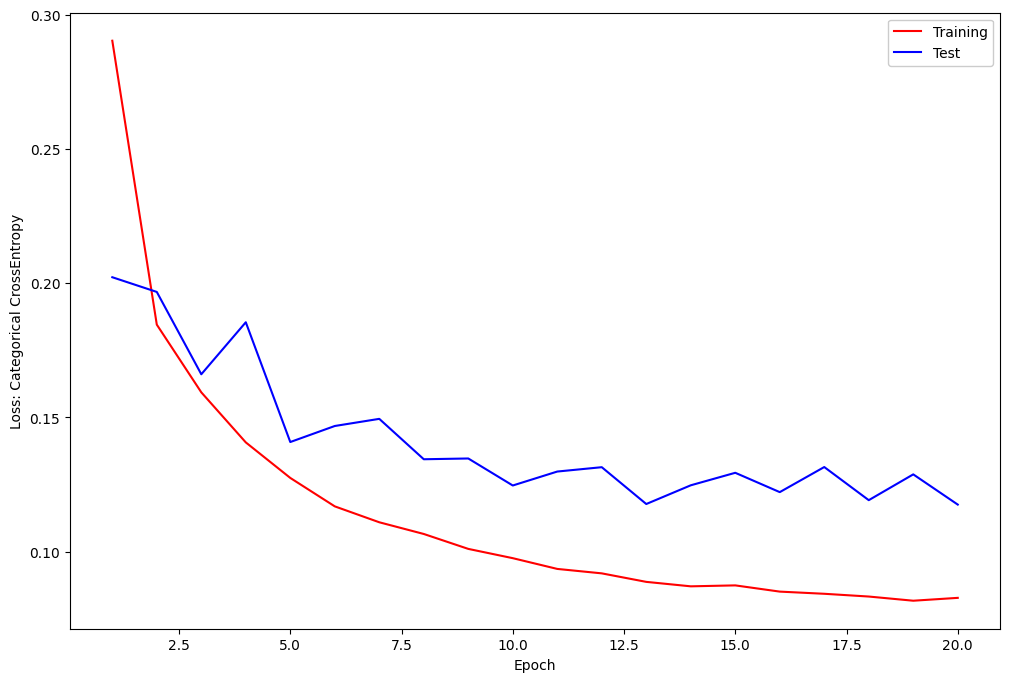

In [ ]:
plt.plot(range(1, 21), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

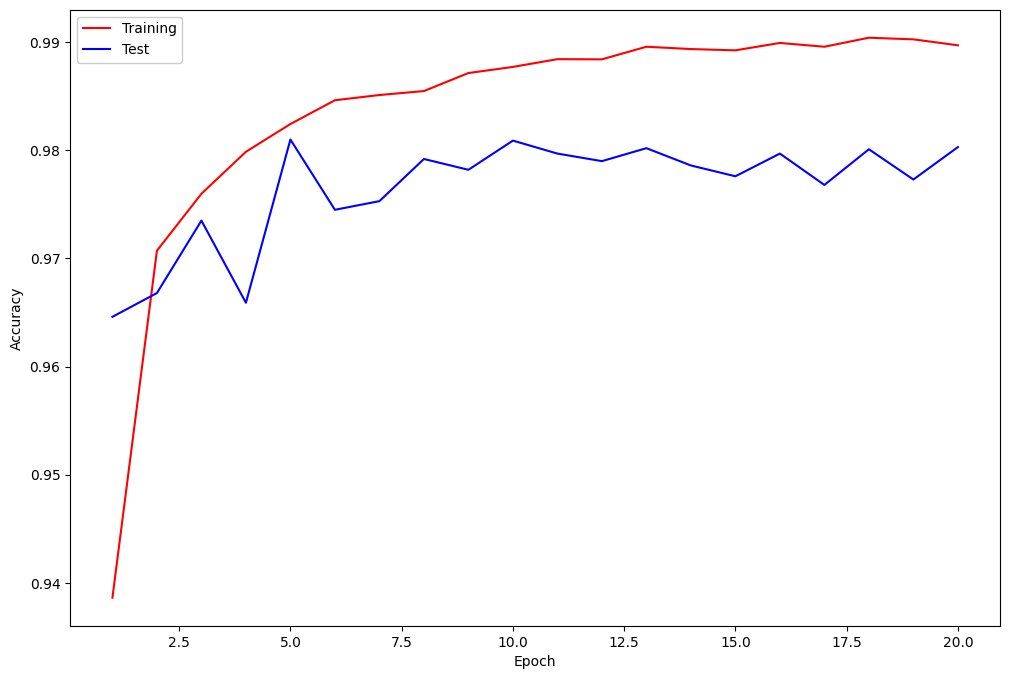

In [ ]:
plt.plot(range(1, 21), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
i = Input((X_train.shape[1],))
d = Dense(512, activation='relu')(i)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = Dense(256, activation='relu')(d)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = Dense(128, activation='relu')(d)
d = BatchNormalization()(d)
d = Dropout(0.5)(d)
d = Dense(10, activation='softmax')(d)
model = Model(i, d)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7521 - loss: 0.8127 - val_accuracy: 0.9563 - val_loss: 0.1404
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9140 - loss: 0.2871 - val_accuracy: 0.9625 - val_loss: 0.1169
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9326 - loss: 0.2291 - val_accuracy: 0.9689 - val_loss: 0.1004
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9413 - loss: 0.2009 - val_accuracy: 0.9717 - val_loss: 0.0895
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9408 - loss: 0.1985 - val_accuracy: 0.9741 - val_loss: 0.0810
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9493 - loss: 0.1703 - val_accuracy: 0.9759 - val_loss: 0.0767
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9529 - loss: 0.1595 - val_accuracy: 0.9776 - val_loss: 0.0714
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9572 - loss: 0.1427 

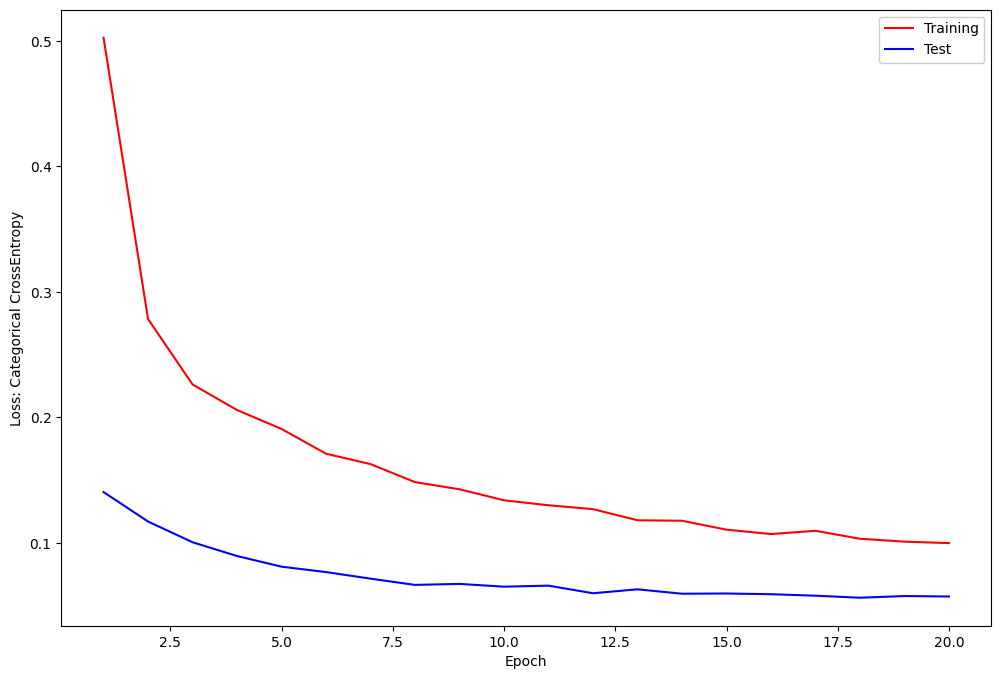

In [ ]:
plt.plot(range(1, 21), history.history['loss'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_loss'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Loss: Categorical CrossEntropy')
plt.show()

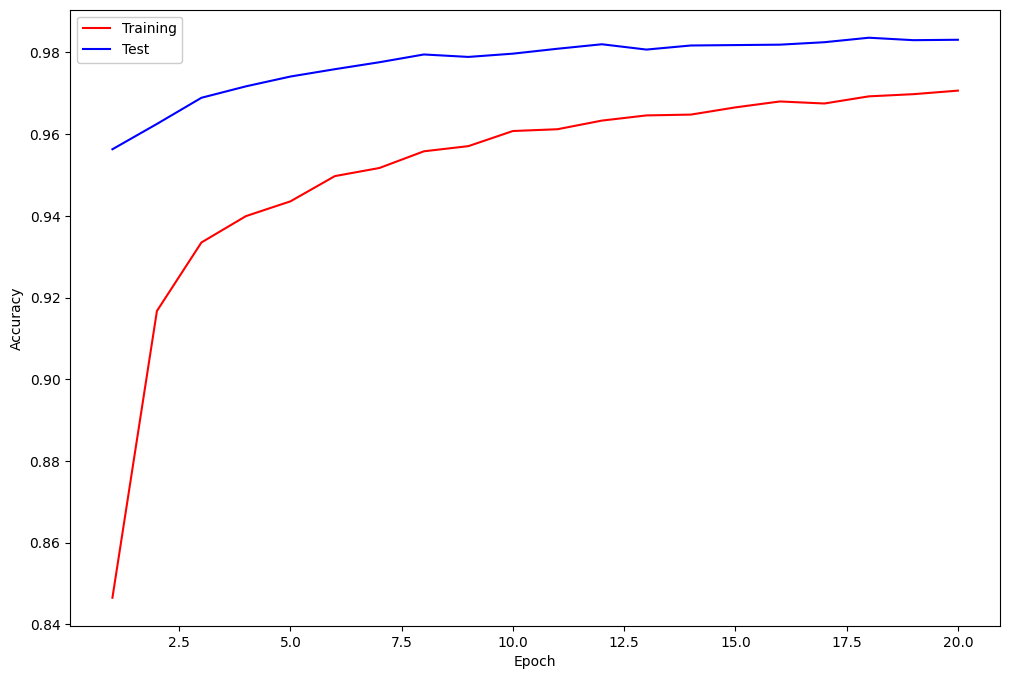

In [ ]:
plt.plot(range(1, 21), history.history['accuracy'], 'r-',label='Training')
plt.plot(range(1, 21), history.history['val_accuracy'], 'b-', label='Test')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## ¿Cuál es el efecto de las diferentes capas de regularización?

En las siguientes celdas se muestra el efecto de la regularización.

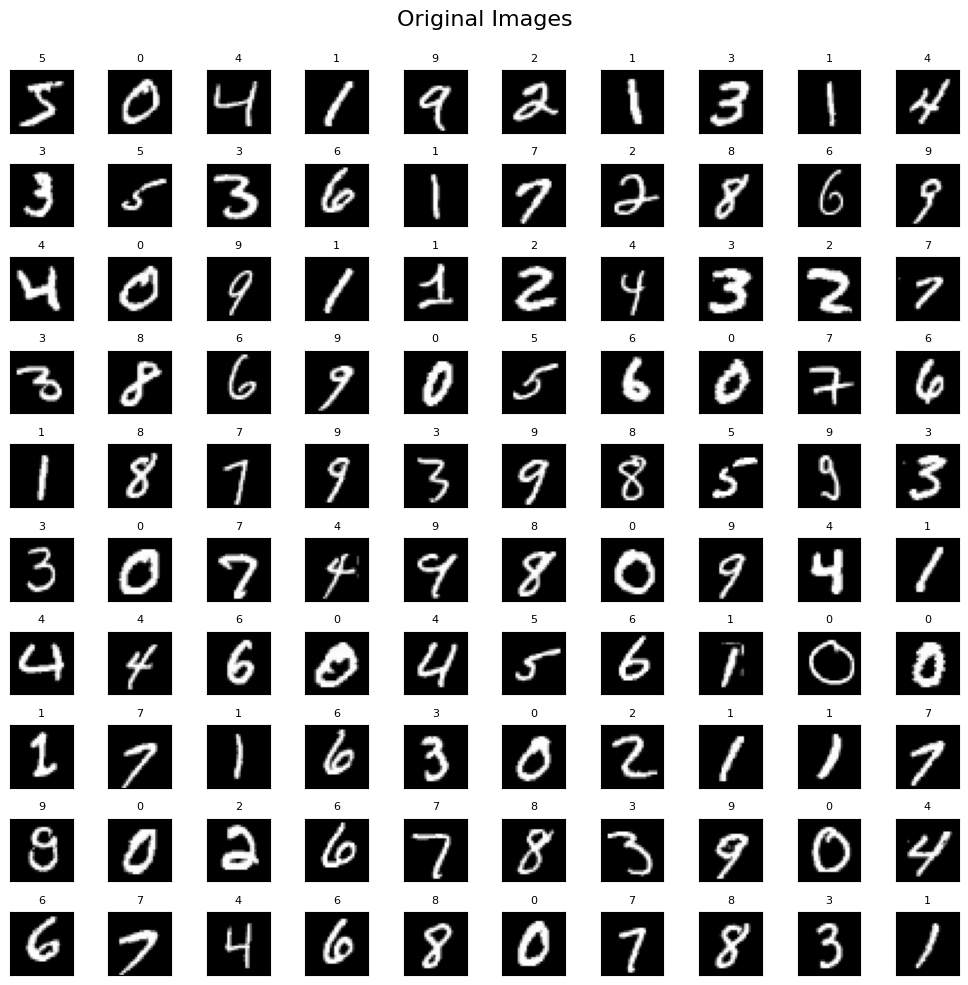

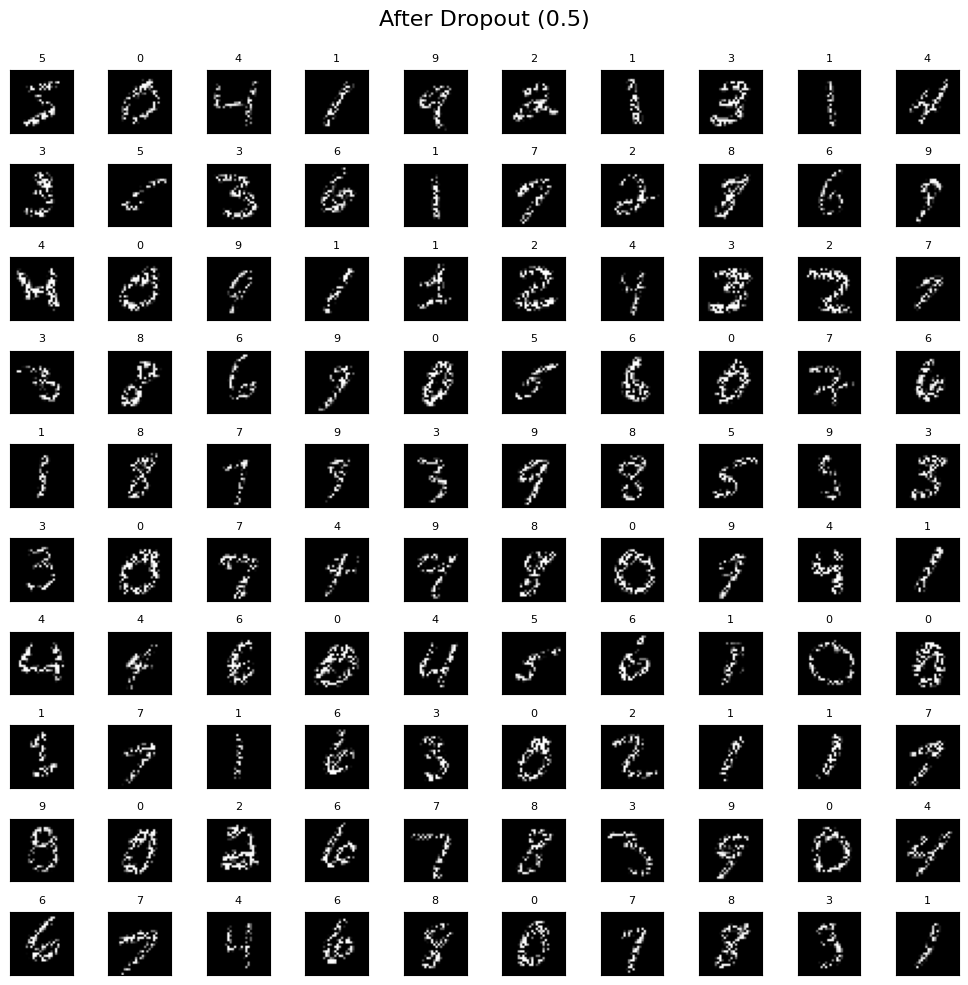

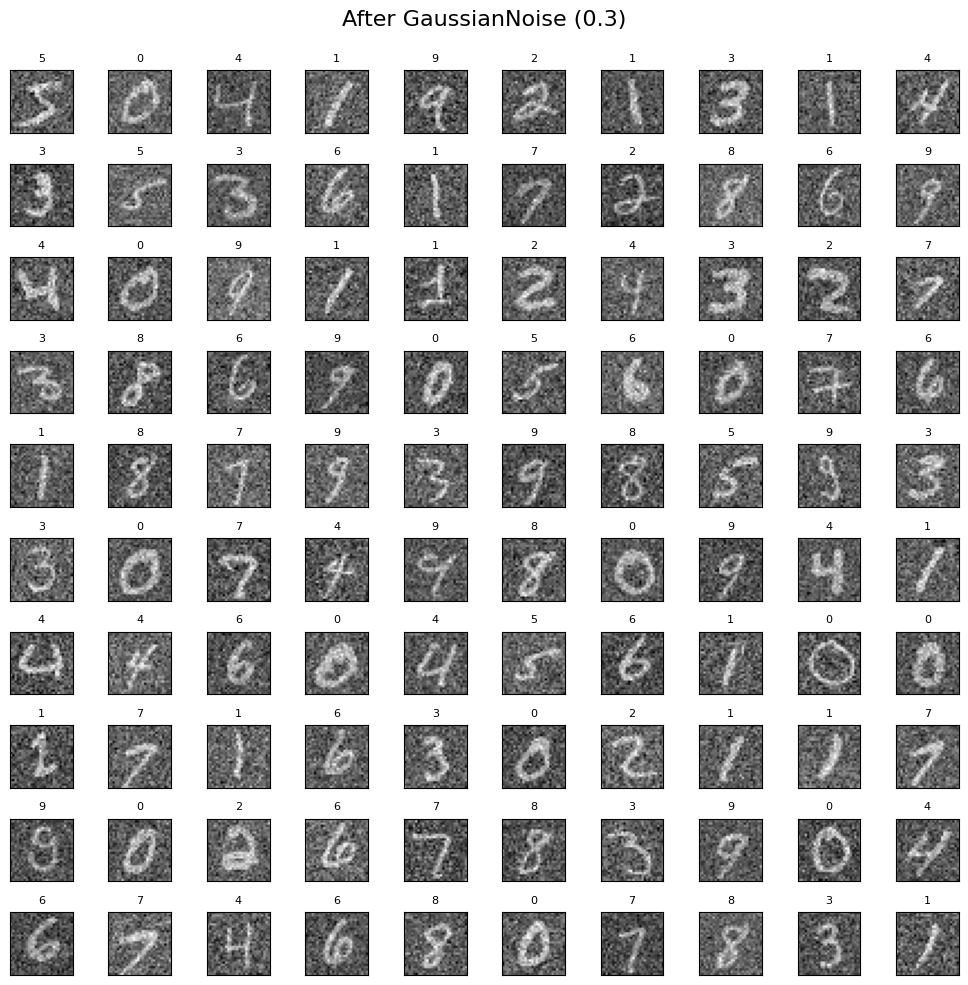

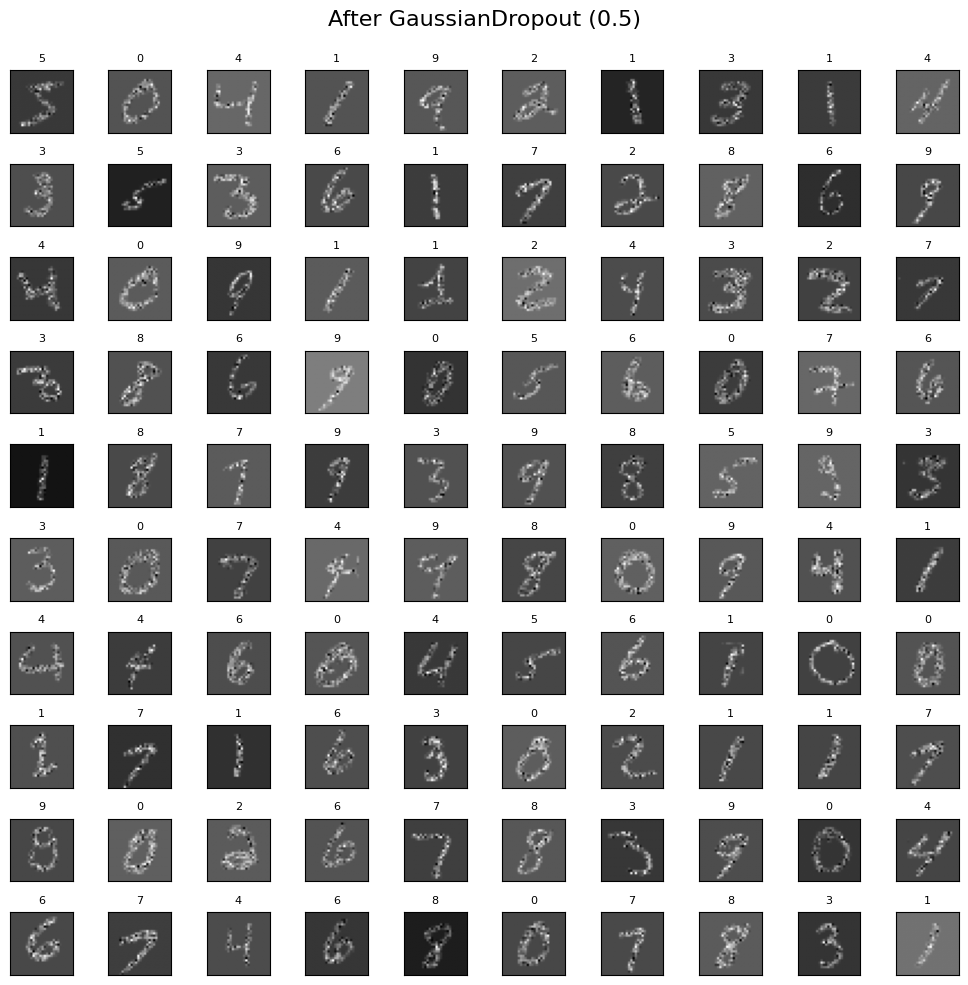

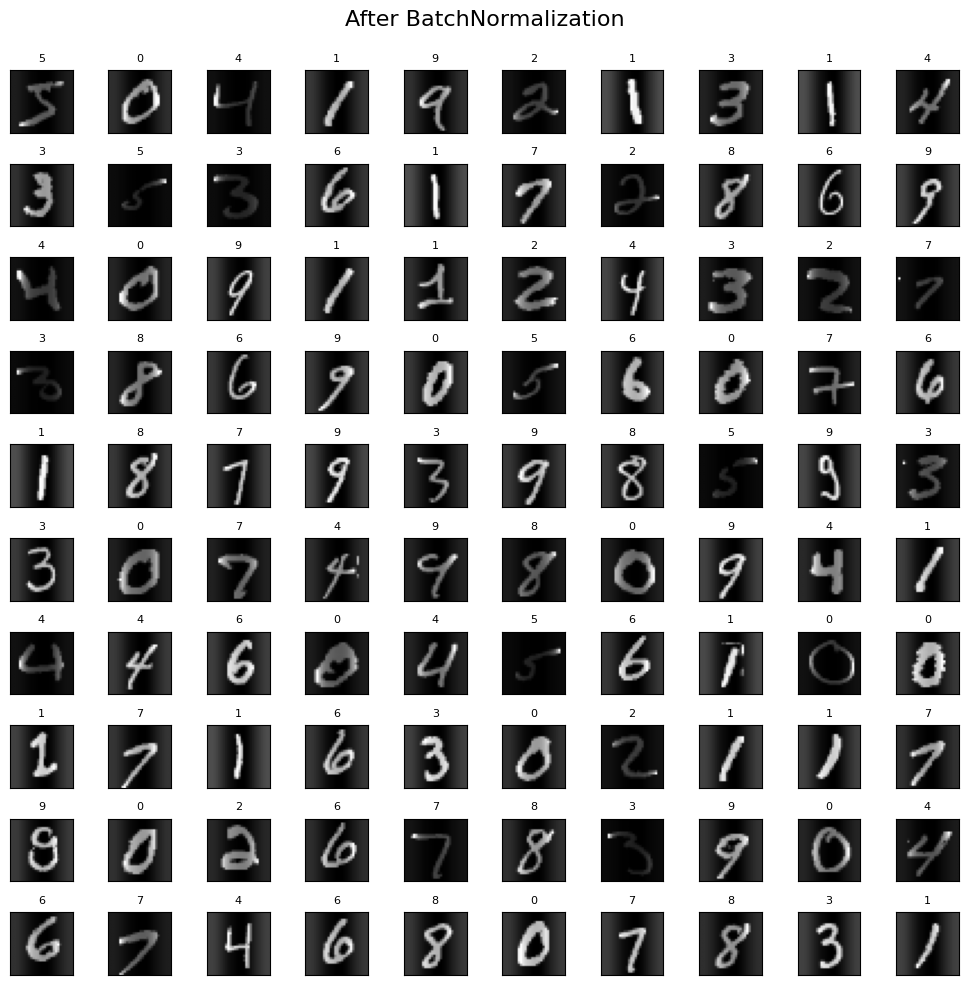

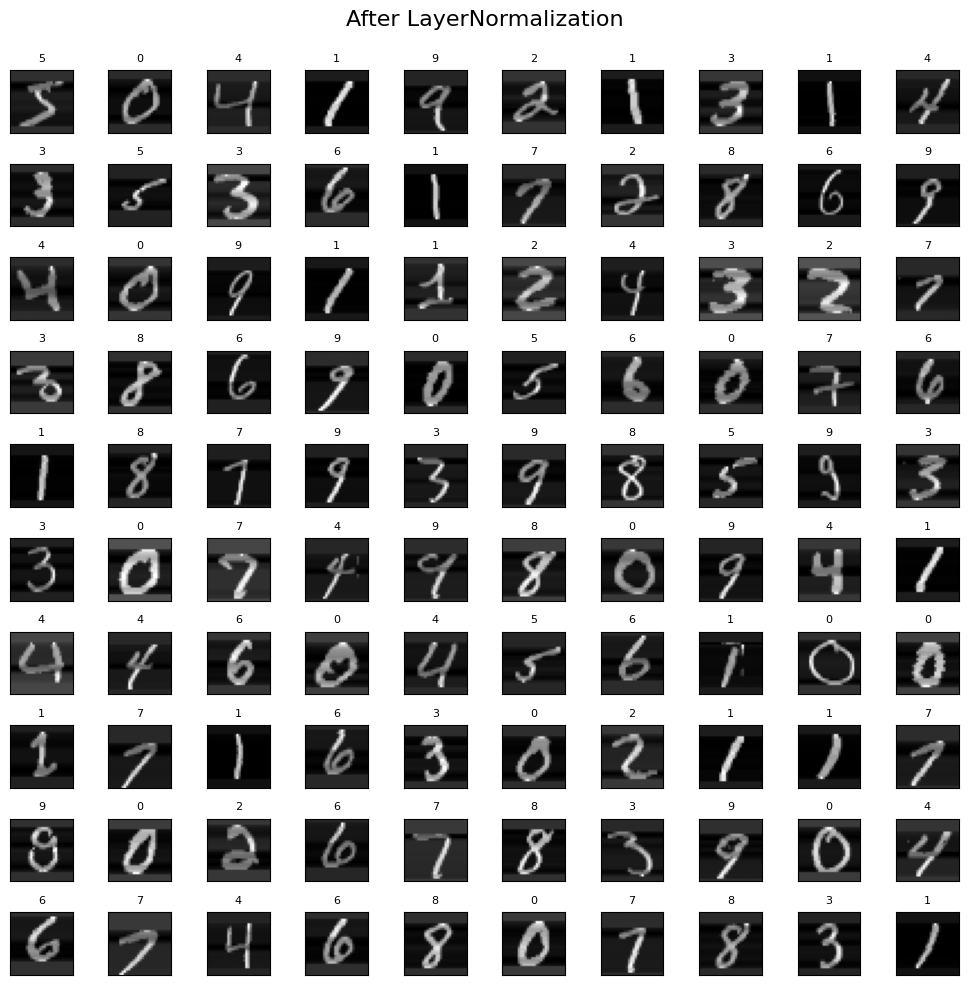

In [ ]:
# Cargar y normalizar datos
def load_and_normalize_data():
    # Carga el dataset MNIST y normaliza los valores de los píxeles
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    return X_train / 255, y_train, X_test / 255, y_test

# Visualización de imágenes con etiquetas
def plot_images_with_labels(data, labels, title):
    # Muestra una cuadrícula de 10x10 imágenes con sus etiquetas
    f = plt.figure(figsize=(10, 10))
    for i in range(10):
        for j in range(10):
            idx = i + j * 10
            ax = f.add_subplot(10, 10, idx + 1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(data[idx], cmap='gray')
            ax.set_title(labels[idx], fontsize=8)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Aplicar regularización
def apply_regularization(layer, X_train, y_train, name):
    # Aplica una capa de regularización al conjunto de datos
    X_reg = layer(X_train.astype(np.float32), training=True)
    plot_images_with_labels(X_reg, y_train, f"After {name}")
    return X_reg

# Main: Cargar datos, aplicar regularizaciones y visualizar resultados
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_and_normalize_data()

    # Mostrar imágenes originales con etiquetas
    plot_images_with_labels(X_train, y_train, "Original Images")

    # Aplicar y visualizar diferentes regularizaciones
    apply_regularization(Dropout(0.5), X_train, y_train, "Dropout (0.5)")
    apply_regularization(GaussianNoise(0.3), X_train, y_train, "GaussianNoise (0.3)")
    apply_regularization(GaussianDropout(0.5), X_train, y_train, "GaussianDropout (0.5)")
    apply_regularization(BatchNormalization(), X_train, y_train, "BatchNormalization")
    apply_regularization(LayerNormalization(), X_train, y_train, "LayerNormalization")


# Clasificador de gatitos y perritos
https://keras.io/examples/vision/image_classification_from_scratch/

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   125M      0  0:00:06  0:00:06 --:--:--  107M


In [ ]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


In [ ]:
!ls PetImages


Cat  Dog


In [ ]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 1590 images.


In [ ]:
image_size = (180, 180)
batch_size = 64 # 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


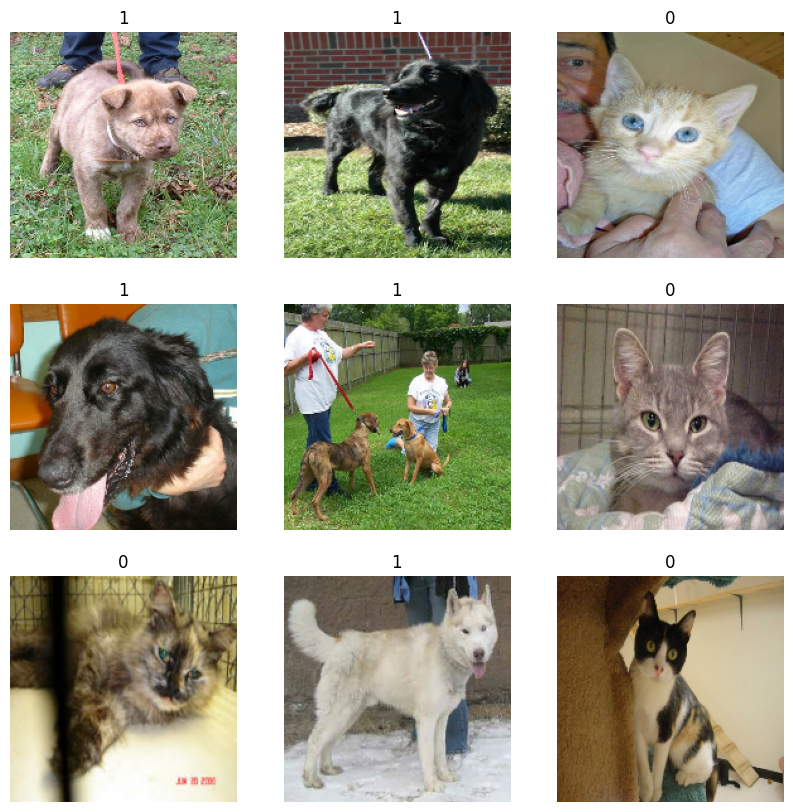

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

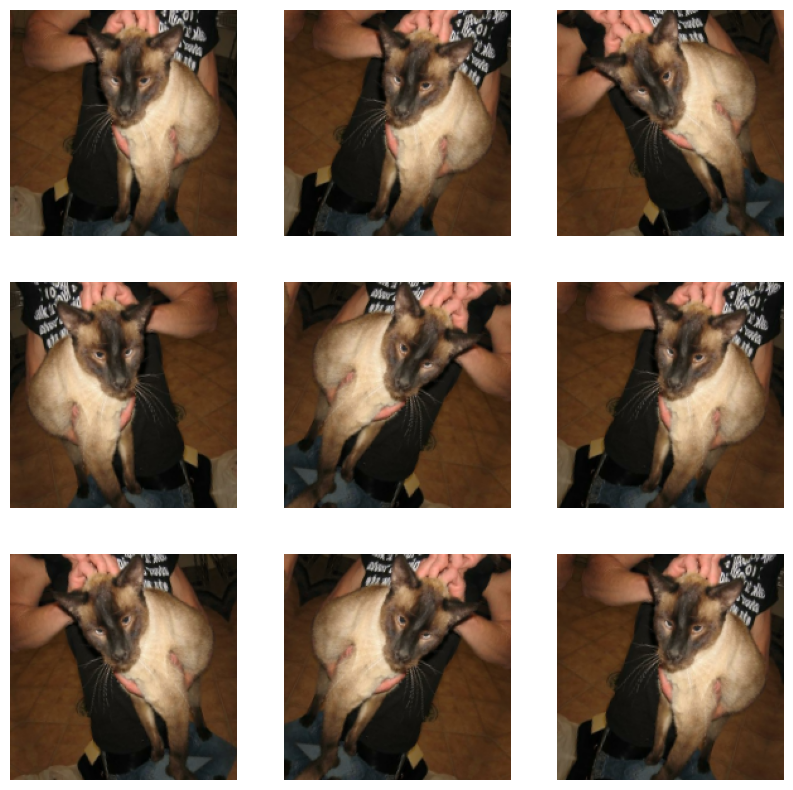

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

## Estandarización de los datos
Nuestras imágenes ya tienen un tamaño estándar (180 x 180), ya que nuestro conjunto de datos las genera como lotes float32 contiguos. Sin embargo, sus valores de canal RGB están en el rango [0, 255]. Esto no es ideal para una red neuronal; en general, debe intentar que sus valores de entrada sean pequeños. Aquí, estandarizaremos los valores para que estén en el rango [0, 1] mediante el uso de una capa de reescalado al comienzo de nuestro modelo.

### Dos opciones para preprocesar los datos

Hay dos formas de usar el preprocesador data_augmentation:

**Opción 1**: Conviértalo en parte del modelo, de esta manera:



```python

inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
... # Resto del modelo

```


Con esta opción, el aumento de datos se realizará en el dispositivo, de manera sincrónica con el resto de la ejecución del modelo, lo que significa que se beneficiará de la aceleración de la GPU.

Ten en cuenta que el aumento de datos está inactivo en el momento de la prueba, por lo que las muestras de entrada solo se aumentarán durante fit(), no cuando se llame a evaluation() o predict().

Si estás entrenando en la GPU, esta puede ser una buena opción.

**Opción 2**: aplicarlo al conjunto de datos, de modo de obtener un conjunto de datos que genere lotes de imágenes aumentadas, como este:

```python

augmented_train_ds = train_ds.map(
lambda x, y: (data_augmentation(x, training=True), y))

```

Con esta opción, el aumento de datos se realizará en la CPU, de forma asincrónica, y se almacenará en búfer antes de ingresar al modelo.

Si está entrenando en la CPU, esta es la mejor opción, ya que hace que el aumento de datos sea asincrónico y no bloqueante.

En nuestro caso, optaremos por la segunda opción. Si no está seguro de cuál elegir, esta segunda opción (preprocesamiento asincrónico) siempre es una opción sólida.

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

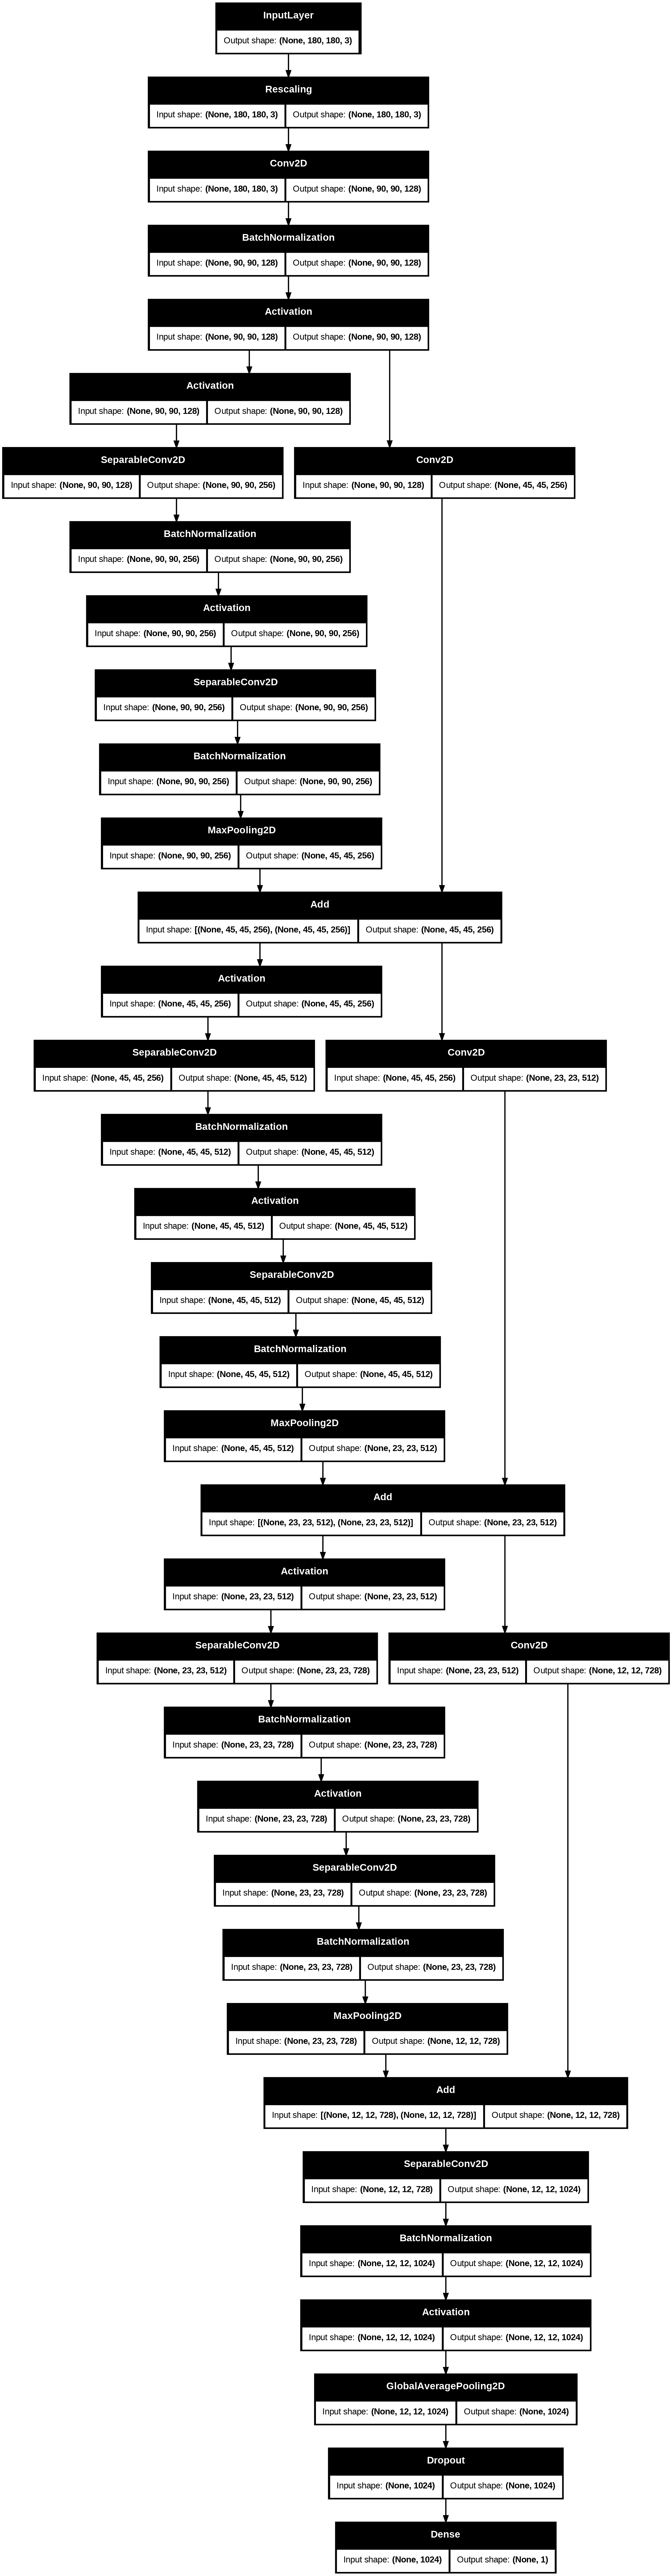

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-2),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 273s 726ms/step - acc: 0.5285 - loss: 0.9432 - val_acc: 0.5581 - val_loss: 0.6684
Epoch 2/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 157s 534ms/step - acc: 0.5647 - loss: 0.6662 - val_acc: 0.5032 - val_loss: 0.7957
Epoch 3/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 157s 534ms/step - acc: 0.5772 - loss: 0.6530 - val_acc: 0.6202 - val_loss: 0.6545
Epoch 4/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 202s 535ms/step - acc: 0.5946 - loss: 0.6406 - val_acc: 0.5985 - val_loss: 0.6859
Epoch 5/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 156s 531ms/step - acc: 0.6090 - loss: 0.6280 - val_acc: 0.6640 - val_loss: 0.6403
Epoch 6/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 156s 531ms/step - acc: 0.6209 - loss: 0.6227 - val_acc: 0.6672 - val_loss: 0.6103
Epoch 7/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 156s 530ms/step - acc: 0.6451 - loss: 0.6071 - val_acc: 0.5607 - val_loss: 0.6682
Epoch 8/25
293/293 ━━━━━━━━━━━━━━━━━━━━ 202s 531ms/step - acc: 0.6459 - loss: 0.6043 - val_acc: 0.5852 - val_loss: 0.6315
Epoch 9/25
293/293 ━━━━━

In [ ]:
img = keras.utils.load_img("PetImages/Cat/6779.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image is 96.05% cat and 3.95% dog.


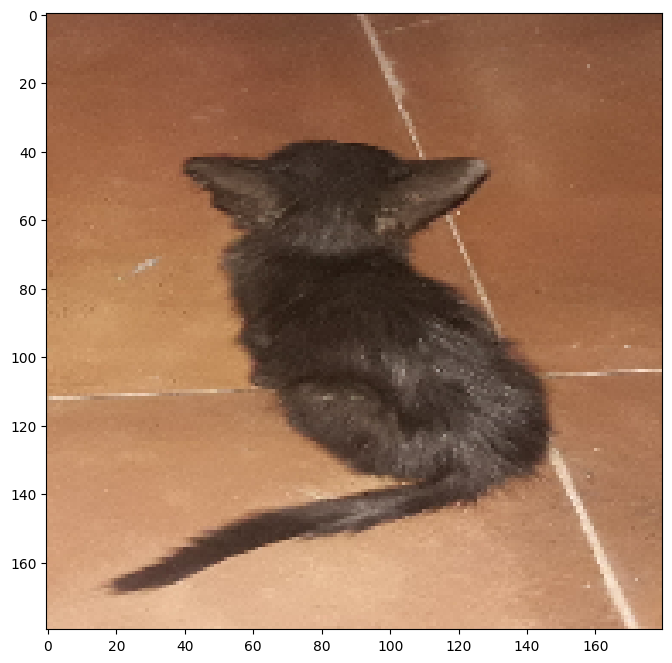

In [ ]:
img = keras.utils.load_img("/content/gato_.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

In [ ]:
# Registrar el tiempo de finalización
end_time = time.time()

# Calcular y mostrar el tiempo transcurrido en formato legible
total_time = end_time - start_time
hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Tiempo total de ejecución: {int(hours):02}:{int(minutes):02}:{int(seconds):02}")


Tiempo total de ejecución: 01:36:25
